<a href="https://colab.research.google.com/github/ManavGuru/Portfolio/blob/master/CSCE_633_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#IMPORTING THE DATA FROM THE DATASETS.
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from skimage import data, io, filters
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

path3 = "/content/drive/My Drive/Homework 4/OnlineNewsPopularityTest.csv"
path = "/content/drive/My Drive/Homework 4/OnlineNewsPopularityTrain.csv"

train_data_df = pd.read_csv(path)
train_data_df = train_data_df.drop('url', axis=1)
train_data = train_data_df.drop(' shares', axis=1)
feature_list = np.array(train_data.columns)
train_outcomes= train_data_df[' shares']

test_data_df = pd.read_csv(path3)
test_data_df = test_data_df.drop('url', axis=1)
test_data = test_data_df.drop(' shares', axis=1)
test_outcomes= test_data_df[' shares']

In [0]:
X = np.array(train_data)
y = np.array(train_outcomes)
kf = KFold()
kf.get_n_splits(X)

5

In [0]:
def mse (y1, y2):
  summation = 0  #variable to store the summation of differences
  n = len(y1) #finding total number of items in list
  for i in range (n):  #looping through each element of the list
    difference = y1[i] - y2[i]  #finding the difference between observed and predicted value
    squared_difference = difference**2  #taking square of the differene 
    summation = summation + squared_difference  #taking a sum of all the differences
    MSE = summation/n
    return(MSE)


#Decision Tree Regression

In [0]:
# Fit regression model
k_folds = np.array_split(train_data_df,5) 
tree_depth = []
model_score = []
for j in range (1,10): 
  mean_square_error= []
  for k in range(5):
    train = k_folds.copy()
    validation = k_folds [k]
    validation_y = validation[' shares']
    validation_y = np.array(validation_y)
    validation = validation.drop(' shares', axis =1)
    validation = np.array(validation)
    del train[k]
    train = pd.concat(train, sort =False)
    train_y = train[' shares']
    train_y = np.array(train_y)
    train = train.drop (' shares',axis=1)
    train = np.array(train)
    regr_1 = DecisionTreeRegressor(criterion="mse",max_depth=j,random_state=0)
    regr_1.fit(train, train_y)
    y_1 = regr_1.predict(validation)
    mean_square_error.append(mse(y_1, validation_y))
  model_score.append(((sum(mean_square_error))/(len(mean_square_error))))
i=(np.argmin(model_score))
print("Average Scores for different Depths of tree: ", model_score)
print("Best Score: {0} at a tree depth of: {1}".format(model_score[i],[i]))

Average Scores for different Depths of tree:  [1016.3140978011204, 894.0392691925359, 1050.7181523765987, 943.7684687466854, 766.561992792227, 605.2357596807856, 611.7922844782096, 3133.967324267023, 312106.58758286486]
Best Score: 605.2357596807856 at a tree depth of: [5]


In [0]:
print(np.argmin(model_score))

5


In [0]:
regr_2 = DecisionTreeRegressor(criterion="mse",max_depth=i,random_state=0)
regr_2.fit(X,y)
y_2 = regr_2.predict(test_data)
mean_square_error=(mse(y_2,test_outcomes))
print("The final accuracy on the test set is: {0}".format(mean_square_error))

The final accuracy on the test set is: 2239.607809448783


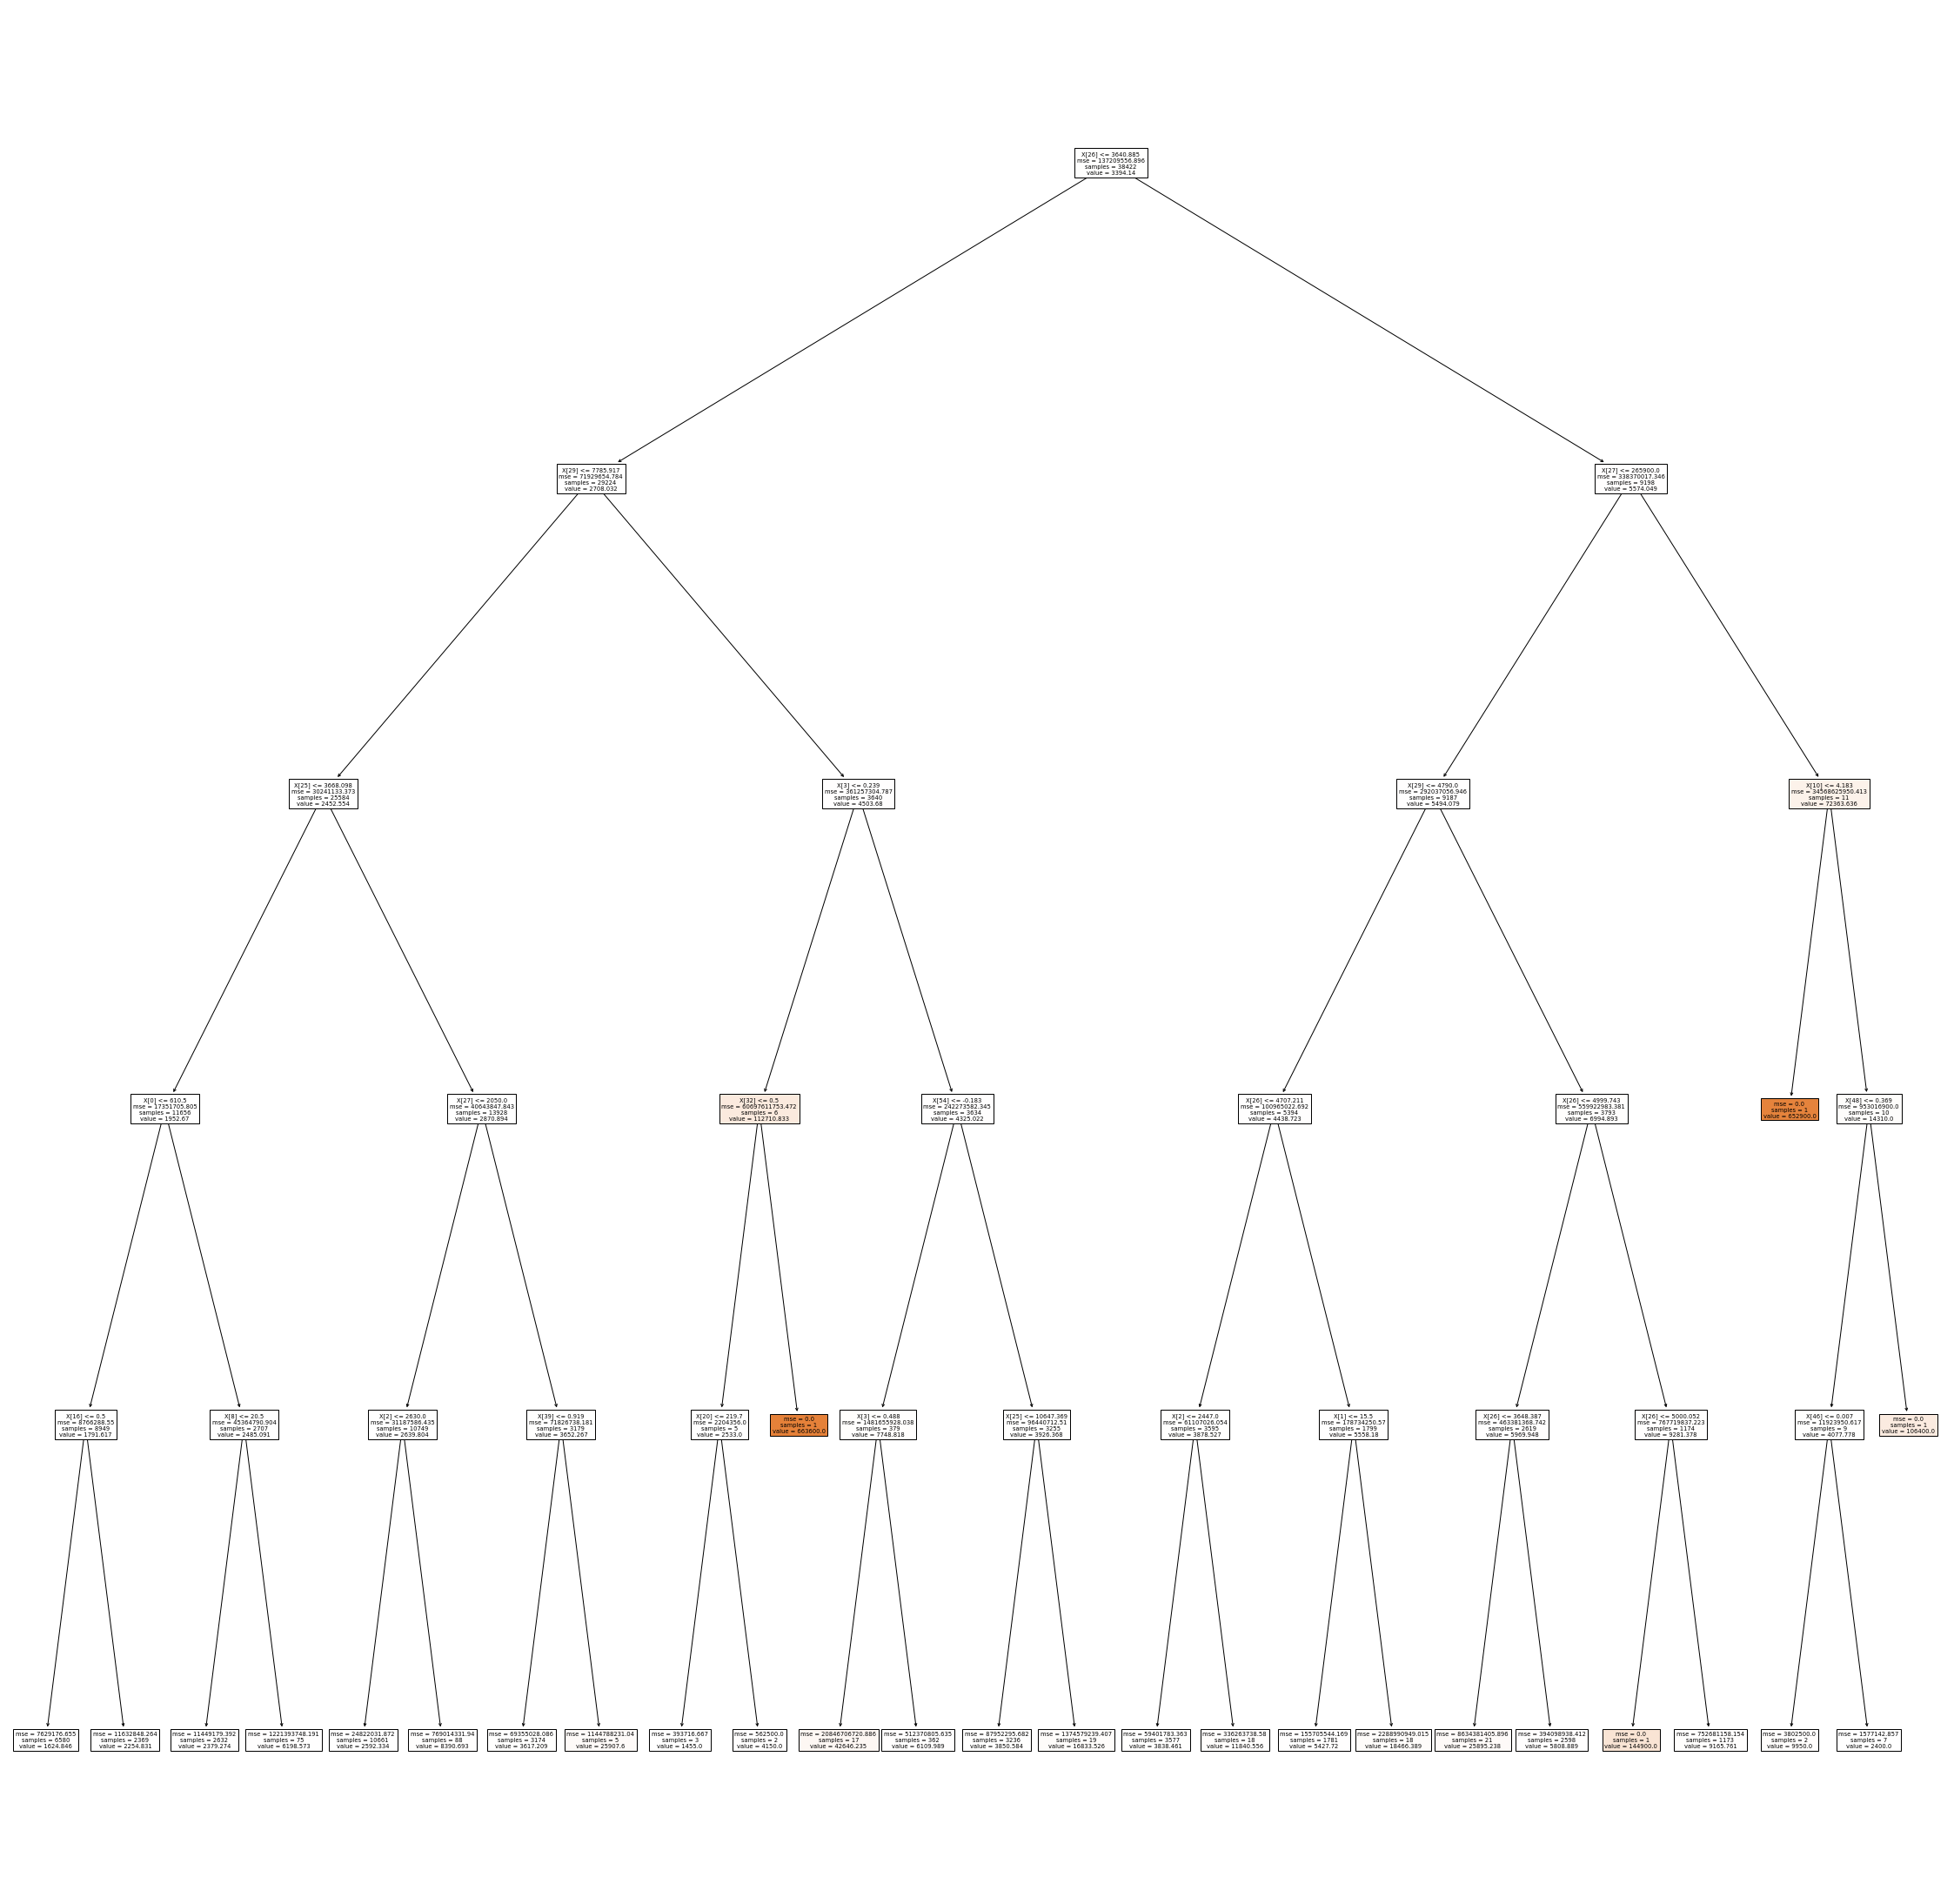

In [0]:
#PLOTTING THIS JUST FOR FUN.
from sklearn import tree
plt.figure(figsize=(40,40))
#tree.plot_tree(regr_2.fit(test_data, test_outcomes)) 
tree.plot_tree(regr_2, filled=True)
plt.show()

#Random Forest Regression


In [0]:
# Fit regression model
def tree_regressor ():
  data_in = train_data_df.sample(frac=0.3,axis=0)
  k_folds = np.array_split(data_in,5) 
  y = data_in[' shares']
  y = np.array(y)
  X = data_in.drop(' shares', axis=1)
  X = np.array(X)
  tree_depth = []
  model_score = []
  y_output = []
  for j in range (1,11): 
    mean_square_error= []
    predicted_output = []
    for k in range(5):
      train = k_folds.copy()
      validation = k_folds [k]
      validation_y = validation[' shares']
      validation_y = np.array(validation_y)
      validation = validation.drop(' shares', axis =1)
      validation = np.array(validation)
      del train[k]
      train = pd.concat(train, sort=False)
      train_y = train[' shares']
      train_y = np.array(train_y)
      train = train.drop (' shares',axis=1)
      train = np.array(train)
      regr_1 = DecisionTreeRegressor(criterion="mse",max_depth=j,max_features="log2")
      regr_1.fit(train, train_y)
      y_1 = regr_1.predict(validation)
      mean_square_error.append(mse(y_1, validation_y))
    model_score.append(((sum(mean_square_error))/(len(mean_square_error))))
  i=(np.argmin(model_score))
  regr_out = DecisionTreeRegressor(criterion="mse",max_depth=j,max_features="log2")
  regr_out.fit(X,y)
  y_out = regr_out.predict(test_data)
  return(y_out)

In [0]:
def random_forest (no_of_trees):
  y_outcomes = []
  for k in range (1, no_of_trees):
    y_outcomes.append(tree_regressor())
  summed_outcomes = np.zeros(len(y_outcomes[0]))
  for i in range(len(y_outcomes)):
    for j in range(len(y_outcomes[i])):
      summed_outcomes[j] = summed_outcomes[j] + y_outcomes[i][j]
  summed_outcomes = summed_outcomes/(len(y_outcomes))
  result = (mse(summed_outcomes,test_outcomes))
  return(result)

In [0]:
best_forest = []
for i in range (2,10):
  temp = (random_forest(i))
  best_forest.append(temp)
i=np.argmin(best_forest)
print("Best performer error is {0} using a forest of {1} trees".format(best_forest[i],i+1))

Best performer error is 1477.6864650270134 using a forest of 8 trees


#Feature Exploration


[9.62466339e-04 2.91732094e-03 3.93012428e-03 8.86356188e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.02432754e-03 0.00000000e+00 3.56996536e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.65716402e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.39288447e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.21802410e-03 9.29751009e-02 4.97306617e-02
 0.00000000e+00 2.69224268e-02 0.00000000e+00 0.00000000e+00
 3.50689021e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.38854951e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.53870264e-05 0.00000000e+00
 9.07391896e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.77640717e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


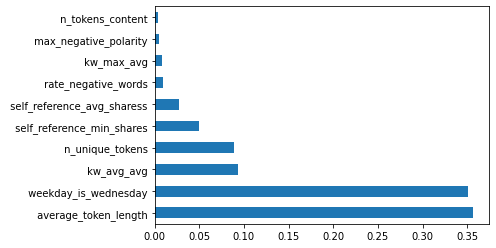

In [0]:
print(regr_2.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(regr_2.feature_importances_,index=feature_list)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()